In [3]:
%load_ext autoreload

# aproximacion inicial (1.1) Gauss Jacobi 

In [4]:
%autoreload 2
from src import gauss_jacobi
#E1   Matriz Original 
A = [[2, 10],[3, 2 ]]
b = [16,11]
x0 = (1,1)
tol = 0.1
max_iter = 10

gauss_jacobi(A=A,b=b,x0=x0,tol=tol,max_iter=max_iter)


[01-25 17:44:03][INFO] 2025-01-25 17:44:03.127943
[01-25 17:44:12][INFO] 2025-01-25 17:44:12.544142
[01-25 17:44:12][INFO] i= 0 x: [[1. 1.]]
[01-25 17:44:12][INFO] i= 1 x: [[3. 4.]]
[01-25 17:44:12][INFO] i= 2 x: [[-12.   1.]]
[01-25 17:44:12][INFO] i= 3 x: [[ 3.  23.5]]
[01-25 17:44:12][INFO] i= 4 x: [[-109.5    1. ]]
[01-25 17:44:12][INFO] i= 5 x: [[  3.   169.75]]
[01-25 17:44:12][INFO] i= 6 x: [[-840.75    1.  ]]
[01-25 17:44:12][INFO] i= 7 x: [[   3.    1266.625]]
[01-25 17:44:12][INFO] i= 8 x: [[-6.325125e+03  1.000000e+00]]
[01-25 17:44:12][INFO] i= 9 x: [[3.0000000e+00 9.4931875e+03]]


(array([[3.0000000e+00],
        [9.4931875e+03]]),
 [array([[1.],
         [1.]]),
  array([[3.],
         [4.]]),
  array([[-12.],
         [  1.]]),
  array([[ 3. ],
         [23.5]]),
  array([[-109.5],
         [   1. ]]),
  array([[  3.  ],
         [169.75]]),
  array([[-840.75],
         [   1.  ]]),
  array([[   3.   ],
         [1266.625]]),
  array([[-6.325125e+03],
         [ 1.000000e+00]]),
  array([[3.0000000e+00],
         [9.4931875e+03]])])

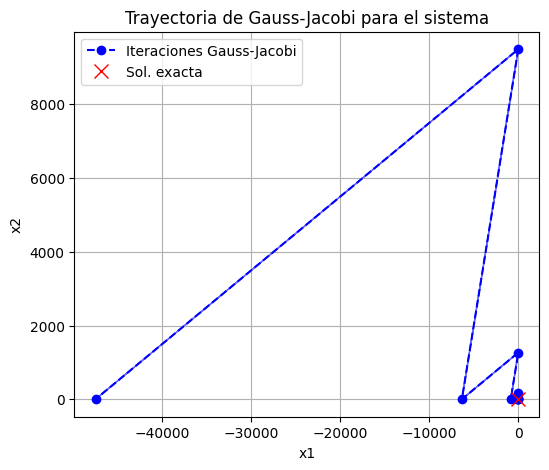

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_jacobi(A, b, x0, tol=1e-3, max_iter=10):
    """
    Implementación sencilla de Gauss-Jacobi que:
      - Devuelve la lista con todos los vectores x^(k),
        empezando en x0 y terminando cuando se alcance tol
        o se cumpla max_iter.
    """
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    x = np.array(x0, dtype=float)
    
    # Preparar para guardar la trayectoria
    iteraciones = [x.copy()]  # x^(0)
    
    n = A.shape[0]
    # Separar la diagonal (D) y la parte R = A - D
    D = np.diag(A)
    R = A - np.diagflat(D)
    
    for _ in range(max_iter):
        x_nuevo = np.zeros_like(x)
        
        for i in range(n):
            # ( b[i] - sum_{j != i} A[i,j]*x[j] ) / A[i,i]
            x_nuevo[i] = (b[i] - np.dot(R[i], x)) / D[i]
        
        iteraciones.append(x_nuevo.copy())
        
        # Criterio de parada (norma infinito)
        if np.linalg.norm(x_nuevo - x, ord=np.inf) < tol:
            x = x_nuevo
            break
        x = x_nuevo
    
    return iteraciones

# ------------------------------
# Tu sistema:
A = [[2, 10],
     [3,  2]]
b = [16, 11]
x0 = (1, 1)

tol = 0.1
max_iter = 10

# Obtenemos la secuencia de puntos (x^(k))
trayectoria = gauss_jacobi(A, b, x0, tol=tol, max_iter=max_iter)

# Convierto la lista de iteraciones a array NumPy para separar x1, x2
trayectoria = np.array(trayectoria)  # shape (n_iteraciones, 2)
x_vals = trayectoria[:, 0]
y_vals = trayectoria[:, 1]

# Graficamos en 2D
plt.figure(figsize=(6, 5))
plt.plot(x_vals, y_vals, 'o--', label='Iteraciones Gauss-Jacobi', color='blue')

# Dibujar flechas (opcional) para mostrar desplazamientos
for k in range(len(trayectoria) - 1):
    plt.arrow(x_vals[k], y_vals[k],
              x_vals[k+1] - x_vals[k],
              y_vals[k+1] - y_vals[k],
              length_includes_head=True,
              head_width=0.05,
              color='blue',
              alpha=0.6)

# Mostrar solución exacta (si la hubiera y no es un caso divergente)
A_np = np.array(A, dtype=float)
b_np = np.array(b, dtype=float)
try:
    sol_exacta = np.linalg.solve(A_np, b_np)
    plt.plot(sol_exacta[0], sol_exacta[1], 'rx', markersize=10, label='Sol. exacta')
except np.linalg.LinAlgError:
    pass

plt.title('Trayectoria de Gauss-Jacobi para el sistema')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
%autoreload 2
from src import gauss_jacobi
#E1
A = [[3, 2 ],[2, 10]]
b = [11,16]

x0 = (1,1)
tol = 0.1
max_iter = 10

gauss_jacobi(A=A,b=b,x0=x0,tol=tol,max_iter=max_iter)




[01-24 11:42:10][INFO] i= 0 x: [[1. 1.]]
[01-24 11:42:10][INFO] i= 1 x: [[3.  1.4]]
[01-24 11:42:10][INFO] i= 2 x: [[2.73333333 1.        ]]
[01-24 11:42:10][INFO] i= 3 x: [[3.         1.05333333]]


(array([[2.96444444],
        [1.        ]]),
 [array([[1.],
         [1.]]),
  array([[3. ],
         [1.4]]),
  array([[2.73333333],
         [1.        ]]),
  array([[3.        ],
         [1.05333333]])])

# aproximacion inicial (1.1) Gauss Seidel

In [35]:
%autoreload 2
from src import gauss_seidel

#E1
A = [[3, 2 ],[2, 10]]
b = [11,16]

x0 = (1,1)
tol = 0.1
max_iter = 10

gauss_seidel(A=A,b=b,x0=x0,tol=tol,max_iter=max_iter)

[01-24 11:01:40][INFO] i= 0 x: [[1. 1.]]
[01-24 11:01:40][INFO] i= 1 x: [[3. 1.]]


(array([[3.],
        [1.]]),
 [array([[1.],
         [1.]]),
  array([[3.],
         [1.]])])

In [36]:
%autoreload 2
from src import gauss_seidel
# E2
A =[[2, 10], [3, 2 ]]
b = [16,11]

x0 = (1,1)
tol = 0.1
max_iter = 10

gauss_seidel(A=A,b=b,x0=x0,tol=tol,max_iter=max_iter)

[01-24 11:01:42][INFO] i= 0 x: [[1. 1.]]
[01-24 11:01:42][INFO] i= 1 x: [[3. 1.]]


(array([[3.],
        [1.]]),
 [array([[1.],
         [1.]]),
  array([[3.],
         [1.]])])

# aproximacion inicial (5,-2) Gauss Jacobi 